<a href="https://colab.research.google.com/github/msolorzan/Data_science_projects/blob/main/Pokemon_analysis__clusteringipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check if bs4 and urllib libraries are available
!pip list

In [115]:
# Import libraries to connect to page
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = 'https://pokemondb.net/pokedex/all'

request_site = Request(url, headers = {'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko)'})

pokemon_url = urlopen(request_site)

bf_pk = BeautifulSoup(pokemon_url, 'html.parser')

In [134]:
number, name, Type, Total, stats = [], [], [], [], []

In [135]:
for values in bf_pk.find('tbody').find_all({'tr' : 'class'}):
  if values.find('small', {'class' : 'text-muted'}):
    name.append(values.find('small', {'class' : 'text-muted'}).get_text() + ' ' + values.find('a', {'class' : 'ent-name'}).get_text())
  else:
    name.append(values.find('a', {'class' : 'ent-name'}).get_text())
  number.append(values.find('span', {'class' : 'infocard-cell-data'}).get_text())
  Total.append(values.find('td', {'class' : 'cell-num cell-total'}).get_text())
  Type.append(values.find('td', {'class' : 'cell-icon'}).get_text())
  for i in range(2, 8):
    stats.append(values.find_all('td', {'class' : 'cell-num'})[i].get_text())

In [136]:
import numpy as np

stats = np.reshape(np.array(stats), (1075, 6)).astype('int16')

In [137]:
pokedata = np.array([number, name, Type, Total]).T

In [138]:
stats, pokedata = pd.DataFrame(stats, columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']), pd.DataFrame(pokedata, columns = ['number', 'Name', 'Type', 'Total'])

In [139]:
pokedf = pd.concat([pokedata, stats], axis = 1)

In [141]:
pokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   1075 non-null   object
 1   Name     1075 non-null   object
 2   Type     1075 non-null   object
 3   Total    1075 non-null   object
 4   HP       1075 non-null   int16 
 5   Attack   1075 non-null   int16 
 6   Defense  1075 non-null   int16 
 7   Sp. Atk  1075 non-null   int16 
 8   Sp. Def  1075 non-null   int16 
 9   Speed    1075 non-null   int16 
dtypes: int16(6), object(4)
memory usage: 46.3+ KB


In [145]:
pokedf['number'] = pokedf['number'].astype(np.int16)
pokedf['Total'] = pokedf['Total'].astype(np.int16)

In [146]:
pokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   number   1075 non-null   int16 
 1   Name     1075 non-null   object
 2   Type     1075 non-null   object
 3   Total    1075 non-null   int16 
 4   HP       1075 non-null   int16 
 5   Attack   1075 non-null   int16 
 6   Defense  1075 non-null   int16 
 7   Sp. Atk  1075 non-null   int16 
 8   Sp. Def  1075 non-null   int16 
 9   Speed    1075 non-null   int16 
dtypes: int16(8), object(2)
memory usage: 33.7+ KB


In [148]:
pokedf.to_csv('/content/drive/MyDrive/Data_science/pokemon/Pokemon_dataframe.csv')

In [149]:
pokedf.describe()

,number,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000
mean,444.312558,440.697674,70.275349,80.847442,74.760930,73.296744,72.382326,69.134884
std,264.180041,121.841330,26.642689,32.408889,31.161763,32.862140,28.005817,30.220442
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,213.500000,330.000000,50.000000,56.000000,50.500000,50.000000,50.000000,45.000000
50%,442.000000,460.000000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000
75%,675.500000,516.000000,83.500000,100.000000,90.000000,95.000000,90.000000,90.000000
max,905.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [156]:
pokedf.corr()

,number,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
number,1.000000,0.146881,0.131492,0.140124,0.105580,0.100552,0.088430,0.025830
Total,0.146881,1.000000,0.652702,0.734412,0.628757,0.731994,0.719294,0.557821
HP,0.131492,0.652702,1.000000,0.450904,0.304683,0.370663,0.392077,0.185784
Attack,0.140124,0.734412,0.450904,1.000000,0.460452,0.365253,0.268800,0.369953
Defense,0.105580,0.628757,0.304683,0.460452,1.000000,0.221837,0.538613,0.001066
Sp. Atk,0.100552,0.731994,0.370663,0.365253,0.221837,1.000000,0.513960,0.440277
Sp. Def,0.088430,0.719294,0.392077,0.268800,0.538613,0.513960,1.000000,0.225097
Speed,0.025830,0.557821,0.185784,0.369953,0.001066,0.440277,0.225097,1.000000


In [157]:
correlations = np.array(pokedf.corr())[1:,1:]

In [158]:
correlations

array([[1.        , 0.65270244, 0.73441212, 0.62875712, 0.73199391,
        0.71929443, 0.55782134],
       [0.65270244, 1.        , 0.4509036 , 0.30468295, 0.37066335,
        0.39207688, 0.18578413],
       [0.73441212, 0.4509036 , 1.        , 0.46045161, 0.36525269,
        0.26879976, 0.36995323],
       [0.62875712, 0.30468295, 0.46045161, 1.        , 0.22183718,
        0.53861304, 0.00106551],
       [0.73199391, 0.37066335, 0.36525269, 0.22183718, 1.        ,
        0.51395969, 0.44027721],
       [0.71929443, 0.39207688, 0.26879976, 0.53861304, 0.51395969,
        1.        , 0.2250974 ],
       [0.55782134, 0.18578413, 0.36995323, 0.00106551, 0.44027721,
        0.2250974 , 1.        ]])

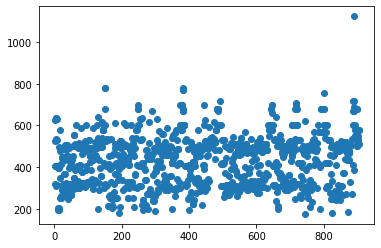

In [159]:
import matplotlib.pyplot as plt

plt.scatter(pokedf['number'], pokedf['Total'])

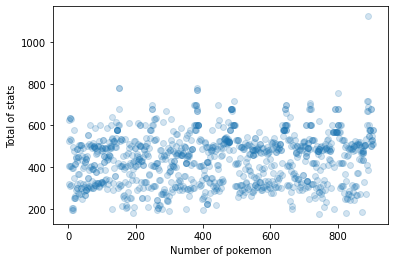

In [160]:
plt.scatter(pokedf['number'], pokedf['Total'], alpha = 0.2)
plt.xlabel('Number of pokemon')
plt.ylabel('Total of stats')
plt.show()

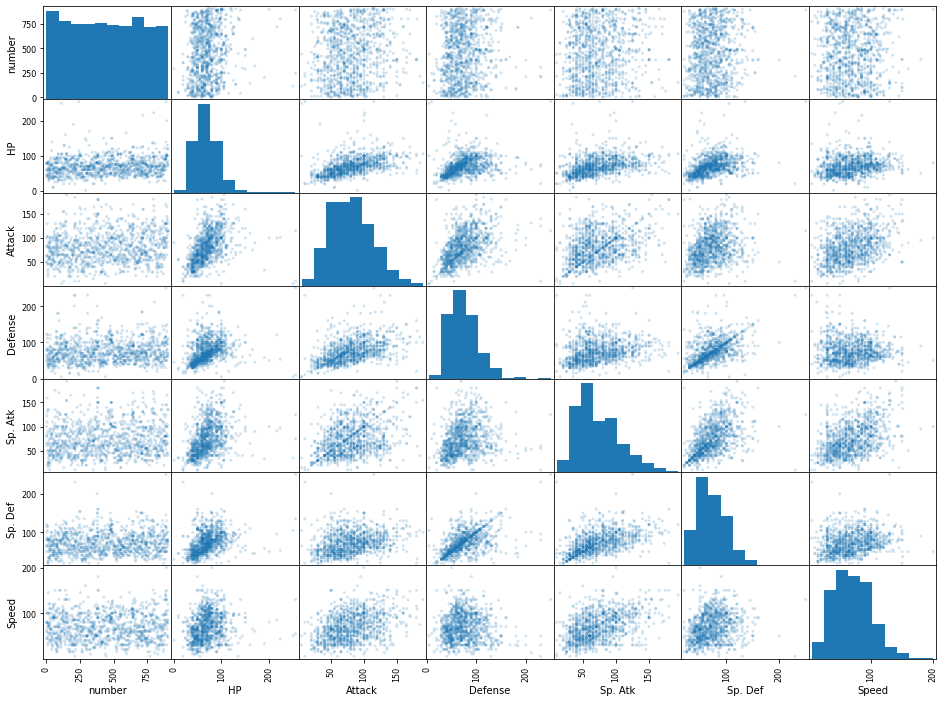

In [165]:
from pandas.plotting import scatter_matrix

attributes = ['number', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
scatter_matrix(pokedf[attributes], figsize = (16, 12), alpha = 0.2)
plt.show()

In [197]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
type_encoding = ordinal_encoder.fit_transform(pokedf[['Type']])
type_encoding

array([[97.],
       [97.],
       [97.],
       ...,
       [24.],
       [52.],
       [52.]])

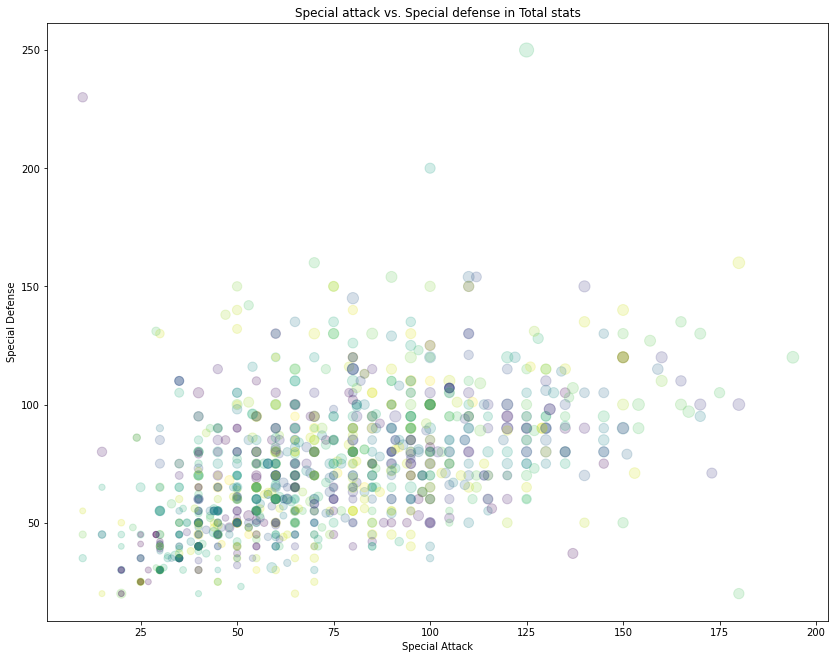

In [234]:
plt.figure(1, (14, 11))
plt.scatter(pokedf['Sp. Atk'], pokedf['Sp. Def'], c = type_encoding, alpha = 0.2, s = (pokedf['Total']/pokedf['Total'].max())*200)
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')
plt.title('Special attack vs. Special defense in Total stats')
plt.show()

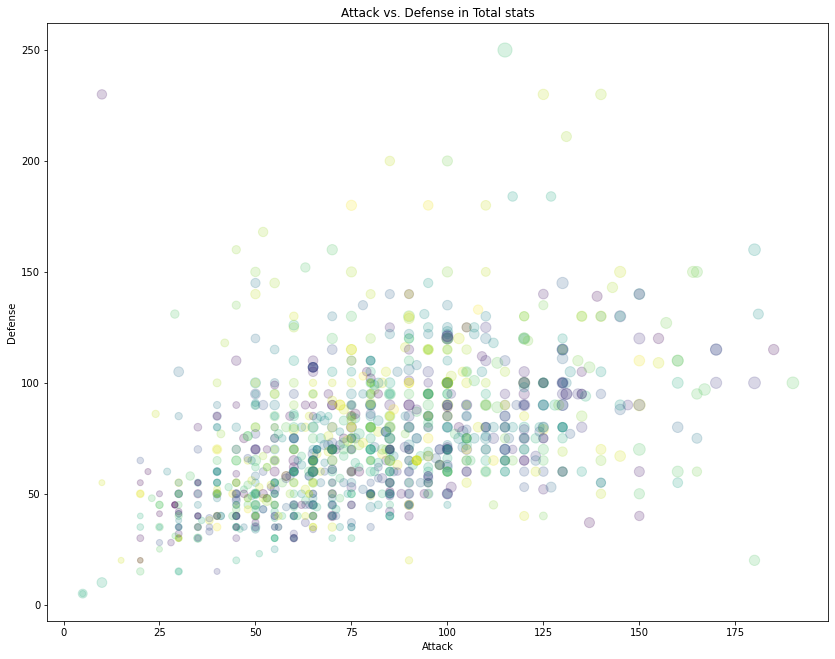

In [252]:
plt.figure(1, (14, 11))
plt.scatter(pokedf['Attack'], pokedf['Defense'], c = type_encoding, alpha = 0.2, s = (pokedf['Total']/pokedf['Total'].max())*200)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs. Defense in Total stats')
plt.show()

In [274]:
atk_def = np.array([pokedf['Attack'], pokedf['Defense']]).T

In [283]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10).fit(atk_def)
  wcss.append(kmeans.inertia_)

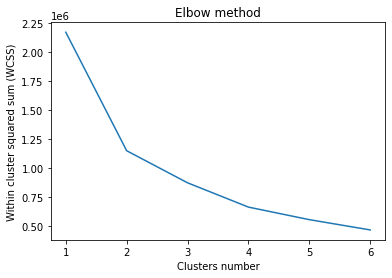

In [284]:
plt.plot(range(1, 7), wcss)
plt.ylabel('Within cluster squared sum (WCSS)')
plt.xlabel('Clusters number')
plt.title('Elbow method')
plt.show()

In [285]:
y_kmeans_predict = KMeans(2).fit_predict(atk_def)

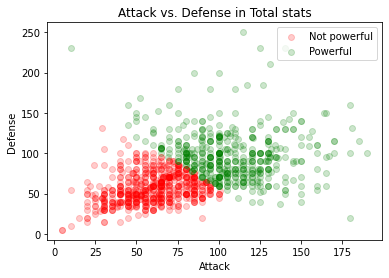

In [309]:
plt.scatter(atk_def[y_kmeans_predict == 0, 0], atk_def[y_kmeans_predict == 0, 1], c = 'r', alpha = 0.2, label = 'Not powerful')
plt.scatter(atk_def[y_kmeans_predict == 1, 0], atk_def[y_kmeans_predict == 1, 1], c = 'g', alpha = 0.2, label = 'Powerful')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs. Defense in Total stats')
plt.legend()
plt.show()